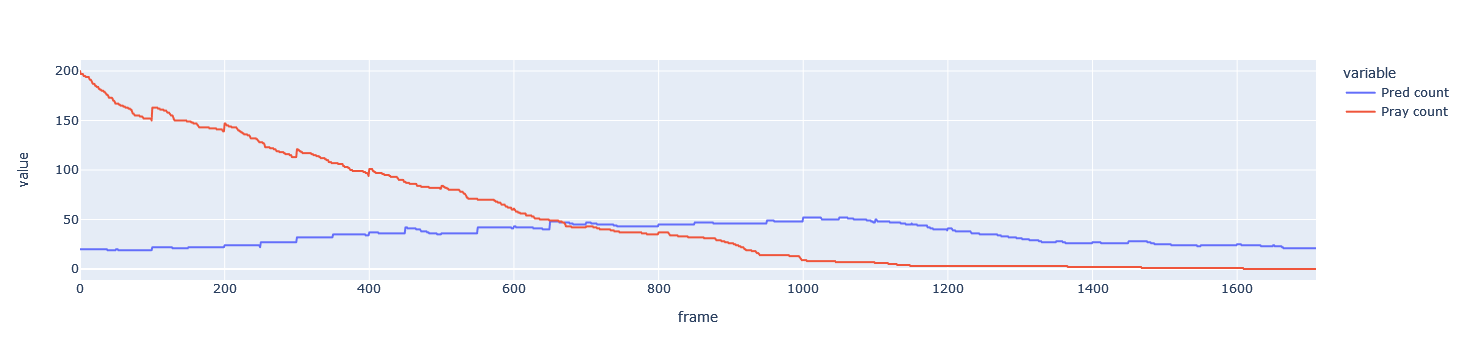

In [2]:
import polars as pl
import os
import plotly.express as px

df = pl.read_csv("data.csv")

df.groupby(["frame", "kind"], maintain_order=True).count()

clean = df.groupby("frame", maintain_order=True).agg(
    [
        pl.col("kind").filter(pl.col("kind") == "Pred").count().alias("Pred count"),
        pl.col("kind").filter(pl.col("kind") == "Pray").count().alias("Pray count"),
    ]
)

file_name = "Population.csv"

if not os.path.exists(file_name):
    with open(file_name, "w"):
        pass

clean.write_csv(file_name, separator=",")

px.line(clean.to_pandas(), x="frame", y=["Pred count", "Pray count"])

In [2]:
pip install pyarrow

  Using cached pyarrow-12.0.1-cp39-cp39-win_amd64.whl (21.5 MB)
Note: you may need to restart the kernel to use updated packages.
